In [63]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
df = pd.read_csv('base_dados.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
condicoes = [(df['APGAR5']<=3), 
               (df['APGAR5']>=4) & (df['APGAR5']<=5), 
               (df['APGAR5']>=6) & (df['APGAR5']<=7), 
               (df['APGAR5']>=8) & (df['APGAR5']<=10)]
tipo_asfixia = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

df['ASFIXIA_CAT'] = np.select(condicoes, tipo_asfixia)
df_ASFIXIA_APGAR5 = df[['APGAR5', 'ASFIXIA_CAT']]
df_ASFIXIA_APGAR5

,APGAR5,ASFIXIA_CAT
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal
...,...,...
27023,9.0,normal
27024,9.0,normal
27025,10.0,normal
27026,9.0,normal


In [4]:
df_APGAR5_grave = df.loc[df['APGAR5']<=3, ['APGAR5', 'ASFIXIA_CAT']]
df_APGAR5_grave

,APGAR5,ASFIXIA_CAT
20,0.0,asfixia grave
185,3.0,asfixia grave
1095,2.0,asfixia grave
1292,0.0,asfixia grave
1455,1.0,asfixia grave
...,...,...
26243,3.0,asfixia grave
26718,3.0,asfixia grave
26822,0.0,asfixia grave
26878,0.0,asfixia grave


In [5]:
df_APGAR5_moderada = df.loc[(df['APGAR5']>=4) & (df['APGAR5']<=5), ['APGAR5', 'ASFIXIA_CAT']]
df_APGAR5_moderada

,APGAR5,ASFIXIA_CAT
182,4.0,asfixia moderada
418,5.0,asfixia moderada
673,4.0,asfixia moderada
1118,5.0,asfixia moderada
1282,5.0,asfixia moderada
...,...,...
26643,5.0,asfixia moderada
26836,4.0,asfixia moderada
26848,4.0,asfixia moderada
26915,5.0,asfixia moderada


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [6]:
#Procurando qual a coluna do tempo de gestação
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'ASFIXIA_CAT'],


In [7]:
df['GESTACAO'].head()

0    37 a 41 semanas
1    37 a 41 semanas
2    37 a 41 semanas
3    37 a 41 semanas
4    37 a 41 semanas
Name: GESTACAO, dtype: object

C:\Users\Bill_\AppData\Local\Temp\ipykernel_1516\4156177323.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(labels=ordem, rotation=90)


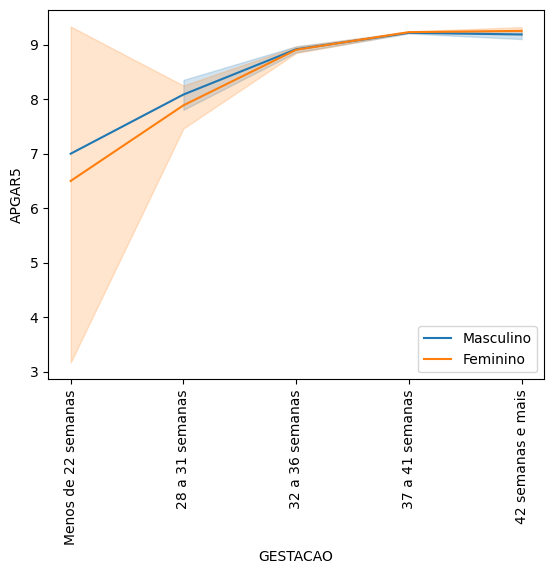

In [8]:
df_copia = df.copy()
ordem = ['Menos de 22 semanas', '28 a 31 semanas', 
         '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']


df_copia['GESTACAO'] = pd.Categorical(df_copia['GESTACAO'], categories=ordem, ordered=True)
fig = sns.lineplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df_copia)
fig.set_xticklabels(labels=ordem, rotation=90)
fig.legend(loc='lower right')

# As manchas em volta das linhas são intevalo de confiança


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [44]:
cross = pd.crosstab(df_copia['APGAR5'], df_copia['GESTACAO'])
cross

GESTACAO,Menos de 22 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais
APGAR5,,,,,
0.0,1,0,2,5,1
1.0,0,0,2,20,0
2.0,1,2,2,3,0
3.0,0,1,2,5,0
4.0,0,5,8,7,0
5.0,0,7,11,21,1
6.0,0,7,17,45,1
7.0,1,11,56,151,5
8.0,0,61,362,1417,44


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [42]:
cross_perc = pd.crosstab(df_copia['APGAR5'], df_copia['GESTACAO'], normalize='index') * 100
cross_perc

GESTACAO,Menos de 22 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais
APGAR5,,,,,
0.0,11.111111,0.000000,22.222222,55.555556,11.111111
1.0,0.000000,0.000000,9.090909,90.909091,0.000000
2.0,12.500000,25.000000,25.000000,37.500000,0.000000
3.0,0.000000,12.500000,25.000000,62.500000,0.000000
4.0,0.000000,25.000000,40.000000,35.000000,0.000000
5.0,0.000000,17.500000,27.500000,52.500000,2.500000
6.0,0.000000,10.000000,24.285714,64.285714,1.428571
7.0,0.446429,4.910714,25.000000,67.410714,2.232143
8.0,0.000000,3.237792,19.214437,75.212314,2.335456


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

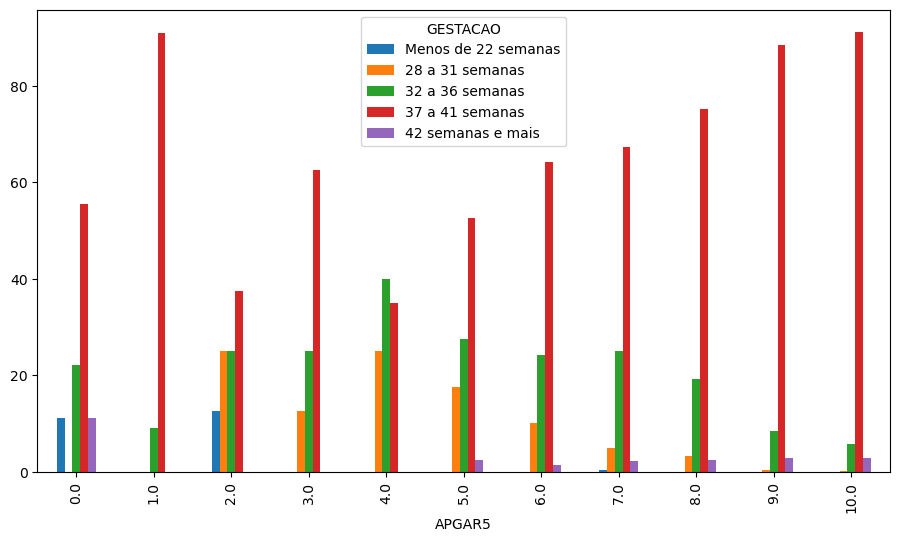

In [49]:
fig_cross = cross_perc.plot(kind='bar', figsize=(11, 6))

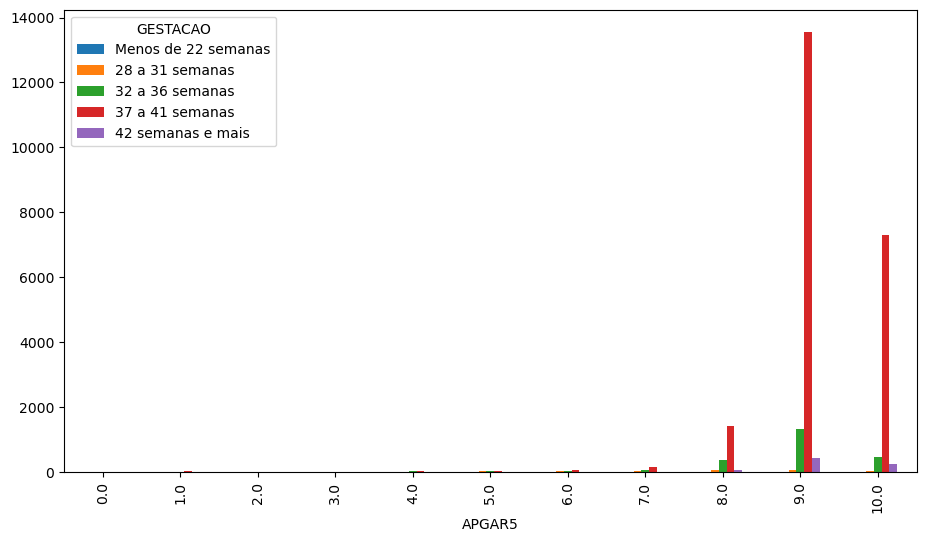

In [45]:
fig_cross = cross.plot(kind='bar', figsize=(11, 6))

Levando em consideração que tem pouquissima informação sobre nascidos com nota 6 ou inferior, da para perceber que os nascidos com menos de 22 semanas estão com notas 2 para baixo;

Também da para perceber que os de 28 a 31 semanas estão apenas entre 2 a 8, com uma porcentagem maior entre 2 a 5. E que quando os APGAR5 sobe de nota, a diferença entre os dados de GESTACAO aumentam.

Da para corroborar com a classificação dos médicos, porém ainda há uma inconsistência nos valores, visto que APGAR5 nota 1 tem muito mais individuos que qualquer outra nota, isso se dá pela falta de exemplos que tem notas inferiores.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

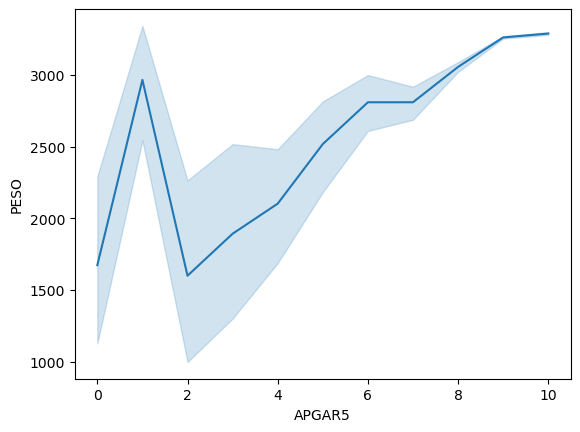

In [62]:
fig_peso = sns.lineplot(x='APGAR5', y='PESO', data=df_copia) 
fig_peso

<Axes: xlabel='APGAR5', ylabel='PESO'>

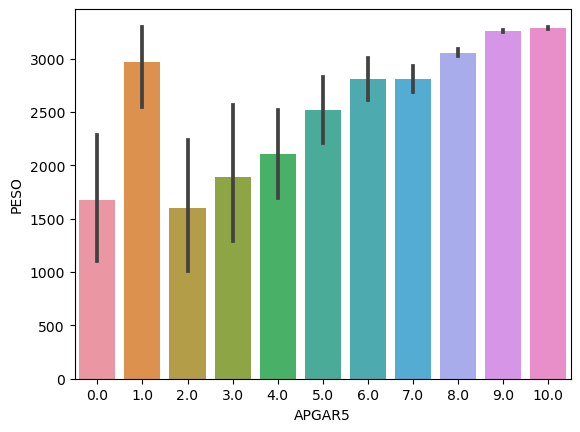

In [69]:
sns.barplot(x='APGAR5', y='PESO', data=df_copia) 